# Global Covid-19 Data Analysis

In [1]:
# Key Questions to ask when analysing this data set
# Questions to ask for Q1
# Population density vs Total infections? (linear regression) 
# GDP/Poverty vs death rate, # Poverty vs infection rate 
# Random sample of HDI vs total cases and death rate



In [1]:
# Importing the relevant dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import matplotlib
import datetime

# To Display all the columns in the DataFrame
pd.options.display.max_columns=None

# Creating a timestamp to plot in the graphs
current_time = datetime.datetime.now()

In [2]:
# Opening the file and creating a DataFrame
raw_covid_19_data = pd.read_csv('..\Resources\owid-covid-data.csv')
raw_covid_19_data

iso_code      continent       location        date  total_cases  \
0          ABW  North America          Aruba  2020-03-13          2.0   
1          ABW  North America          Aruba  2020-03-19          NaN   
2          ABW  North America          Aruba  2020-03-20          4.0   
3          ABW  North America          Aruba  2020-03-21          NaN   
4          ABW  North America          Aruba  2020-03-22          NaN   
...        ...            ...            ...         ...          ...   
47111      NaN            NaN  International  2020-09-26        696.0   
47112      NaN            NaN  International  2020-09-27        696.0   
47113      NaN            NaN  International  2020-09-28        696.0   
47114      NaN            NaN  International  2020-09-29        696.0   
47115      NaN            NaN  International  2020-09-30        696.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0            2.0                 NaN           0.0         0.0   
1            NaN               0.286           NaN         NaN   
2            2.0               0.286           0.0         0.0   
3            NaN               0.286           NaN         NaN   
4            NaN               0.286           NaN         NaN   
...          ...                 ...           ...         ...   
47111        NaN                 NaN           7.0         NaN   
47112        NaN                 NaN           7.0         NaN   
47113        NaN                 NaN           7.0         NaN   
47114        NaN                 NaN           7.0         NaN   
47115        NaN                 NaN           7.0         NaN   

       new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0                      NaN                   18.733                 18.733   
1                      0.0                      NaN                    NaN   
2                      0.0                   37.465                 18.733   
3                      0.0                      NaN                    NaN   
4                      0.0                      NaN                    NaN   
...                    ...                      ...                    ...   
47111                  NaN                      NaN                    NaN   
47112                  NaN                      NaN                    NaN   
47113                  NaN                      NaN                    NaN   
47114                  NaN                      NaN                    NaN   
47115                  NaN                      NaN                    NaN   

       new_cases_smoothed_per_million  total_deaths_per_million  \
0                                 NaN                       0.0   
1                               2.676                       NaN   
2                               2.676                       0.0   
3                               2.676                       NaN   
4                               2.676                       NaN   
...                               ...                       ...   
47111                             NaN                       NaN   
47112                             NaN                       NaN   
47113                             NaN                       NaN   
47114                             NaN                       NaN   
47115                             NaN                       NaN   

       new_deaths_per_million  new_deaths_smoothed_per_million  new_tests  \
0                         0.0                              NaN        NaN   
1                         NaN                              0.0        NaN   
2                         0.0                              0.0        NaN   
3                         NaN                              0.0        NaN   
4                         NaN                              0.0        NaN   
...                       ...                              ...        ...   
47111                     NaN                          

In [3]:
# Substituting NaN data with a zero integer
raw_covid_19_data = raw_covid_19_data.fillna(0)
raw_covid_19_data

iso_code      continent       location        date  total_cases  \
0          ABW  North America          Aruba  2020-03-13          2.0   
1          ABW  North America          Aruba  2020-03-19          0.0   
2          ABW  North America          Aruba  2020-03-20          4.0   
3          ABW  North America          Aruba  2020-03-21          0.0   
4          ABW  North America          Aruba  2020-03-22          0.0   
...        ...            ...            ...         ...          ...   
47111        0              0  International  2020-09-26        696.0   
47112        0              0  International  2020-09-27        696.0   
47113        0              0  International  2020-09-28        696.0   
47114        0              0  International  2020-09-29        696.0   
47115        0              0  International  2020-09-30        696.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0            2.0               0.000           0.0         0.0   
1            0.0               0.286           0.0         0.0   
2            2.0               0.286           0.0         0.0   
3            0.0               0.286           0.0         0.0   
4            0.0               0.286           0.0         0.0   
...          ...                 ...           ...         ...   
47111        0.0               0.000           7.0         0.0   
47112        0.0               0.000           7.0         0.0   
47113        0.0               0.000           7.0         0.0   
47114        0.0               0.000           7.0         0.0   
47115        0.0               0.000           7.0         0.0   

       new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0                      0.0                   18.733                 18.733   
1                      0.0                    0.000                  0.000   
2                      0.0                   37.465                 18.733   
3                      0.0                    0.000                  0.000   
4                      0.0                    0.000                  0.000   
...                    ...                      ...                    ...   
47111                  0.0                    0.000                  0.000   
47112                  0.0                    0.000                  0.000   
47113                  0.0                    0.000                  0.000   
47114                  0.0                    0.000                  0.000   
47115                  0.0                    0.000                  0.000   

       new_cases_smoothed_per_million  total_deaths_per_million  \
0                               0.000                       0.0   
1                               2.676                       0.0   
2                               2.676                       0.0   
3                               2.676                       0.0   
4                               2.676                       0.0   
...                               ...                       ...   
47111                           0.000                       0.0   
47112                           0.000                       0.0   
47113                           0.000                       0.0   
47114                           0.000                       0.0   
47115                           0.000                       0.0   

       new_deaths_per_million  new_deaths_smoothed_per_million  new_tests  \
0                         0.0                              0.0        0.0   
1                         0.0                              0.0        0.0   
2                         0.0                              0.0        0.0   
3                         0.0                              0.0        0.0   
4                         0.0                              0.0        0.0   
...                       ...                              ...        ...   
47111                     0.0                          

# Corrolation between population density and total cases

In [4]:
# Data Cleanup to Answer first question
# Determining columns
raw_covid_19_data.columns

Index([&#39;iso_code&#39;, &#39;continent&#39;, &#39;location&#39;, &#39;date&#39;, &#39;total_cases&#39;, &#39;new_cases&#39;,
       &#39;new_cases_smoothed&#39;, &#39;total_deaths&#39;, &#39;new_deaths&#39;,
       &#39;new_deaths_smoothed&#39;, &#39;total_cases_per_million&#39;,
       &#39;new_cases_per_million&#39;, &#39;new_cases_smoothed_per_million&#39;,
       &#39;total_deaths_per_million&#39;, &#39;new_deaths_per_million&#39;,
       &#39;new_deaths_smoothed_per_million&#39;, &#39;new_tests&#39;, &#39;total_tests&#39;,
       &#39;total_tests_per_thousand&#39;, &#39;new_tests_per_thousand&#39;,
       &#39;new_tests_smoothed&#39;, &#39;new_tests_smoothed_per_thousand&#39;,
       &#39;tests_per_case&#39;, &#39;positive_rate&#39;, &#39;tests_units&#39;, &#39;stringency_index&#39;,
       &#39;population&#39;, &#39;population_density&#39;, &#39;median_age&#39;, &#39;aged_65_older&#39;,
       &#39;aged_70_older&#39;, &#39;gdp_per_capita&#39;, &#39;extreme_poverty&#39;,
      

In [5]:
# ## Removing unnecessary columns
pop_density_cases = raw_covid_19_data.drop(columns=['iso_code','new_cases','new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index','continent'])



In [6]:
# Determining the number of Unique Countries
pop_density_cases['location'].unique()

array([&#39;Aruba&#39;, &#39;Afghanistan&#39;, &#39;Angola&#39;, &#39;Anguilla&#39;, &#39;Albania&#39;, &#39;Andorra&#39;,
       &#39;United Arab Emirates&#39;, &#39;Argentina&#39;, &#39;Armenia&#39;,
       &#39;Antigua and Barbuda&#39;, &#39;Australia&#39;, &#39;Austria&#39;, &#39;Azerbaijan&#39;,
       &#39;Burundi&#39;, &#39;Belgium&#39;, &#39;Benin&#39;, &#39;Bonaire Sint Eustatius and Saba&#39;,
       &#39;Burkina Faso&#39;, &#39;Bangladesh&#39;, &#39;Bulgaria&#39;, &#39;Bahrain&#39;, &#39;Bahamas&#39;,
       &#39;Bosnia and Herzegovina&#39;, &#39;Belarus&#39;, &#39;Belize&#39;, &#39;Bermuda&#39;,
       &#39;Bolivia&#39;, &#39;Brazil&#39;, &#39;Barbados&#39;, &#39;Brunei&#39;, &#39;Bhutan&#39;, &#39;Botswana&#39;,
       &#39;Central African Republic&#39;, &#39;Canada&#39;, &#39;Switzerland&#39;, &#39;Chile&#39;,
       &#39;China&#39;, &quot;Cote d&#39;Ivoire&quot;, &#39;Cameroon&#39;,
       &#39;Democratic Republic of Congo&#39;, &#39;Congo&#39;, &#39;Colombia&#39;, &#39;

In [7]:
# Dropping World and International Data from this frame
pop_density_cases = pop_density_cases[(pop_density_cases['location']!='International') & (pop_density_cases['location']!='World')]
pop_density_cases

location        date  total_cases  population_density
0         Aruba  2020-03-13          2.0             584.800
1         Aruba  2020-03-19          0.0             584.800
2         Aruba  2020-03-20          4.0             584.800
3         Aruba  2020-03-21          0.0             584.800
4         Aruba  2020-03-22          0.0             584.800
...         ...         ...          ...                 ...
46561  Zimbabwe  2020-09-26       7787.0              42.729
46562  Zimbabwe  2020-09-27       7803.0              42.729
46563  Zimbabwe  2020-09-28       7812.0              42.729
46564  Zimbabwe  2020-09-29       7816.0              42.729
46565  Zimbabwe  2020-09-30       7837.0              42.729

[46566 rows x 4 columns]

In [8]:
# Determine if there are outliers
## Population Density
pop_density = pop_density_cases['population_density']
pop_quartile = pop_density.quantile([0.25,0.5,0.75])
pop_q1 = pop_quartile[0.25]
pop_q3 = pop_quartile[0.75]
pop_IQR = pop_q3 - pop_q1

pop_lower_bound = pop_q1 - (pop_IQR * 1.5)
pop_upper_bound = pop_q3 + (pop_IQR * 1.5)

pop_outliers = pop_density.loc[(pop_density<pop_lower_bound)|(pop_density>pop_upper_bound)]

print(f'Outliers for Population Density are\n\n {[p for p in pop_outliers]}')




Outliers for Population Density are

 [584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 584.8, 58

In [9]:
# Determine if there are outliers
## Total Cases
case_density = pop_density_cases['total_cases']
case_quartile = pop_density.quantile([0.25,0.5,0.75])
case_q1 = case_quartile[0.25]
case_q3 = case_quartile[0.75]
case_IQR = case_q3 - case_q1

case_lower_bound = case_q1 - (case_IQR * 1.5)
case_upper_bound = case_q3 + (case_IQR * 1.5)

case_outliers = case_density.loc[(case_density<case_lower_bound)|(case_density>case_upper_bound)]

print(f'Outliers for caseulation Density are\n\n {[c for c in case_outliers]}')

Outliers for caseulation Density are

 [509.0, 563.0, 630.0, 717.0, 798.0, 894.0, 973.0, 1048.0, 1102.0, 1121.0, 1121.0, 1296.0, 1387.0, 1464.0, 1534.0, 1568.0, 1628.0, 1670.0, 1760.0, 1848.0, 1906.0, 1975.0, 1997.0, 2006.0, 2104.0, 2211.0, 2292.0, 2358.0, 2428.0, 2449.0, 2482.0, 2589.0, 2730.0, 2819.0, 2898.0, 2994.0, 3046.0, 3060.0, 3152.0, 3328.0, 3382.0, 3460.0, 3460.0, 3551.0, 3587.0, 3665.0, 3721.0, 3756.0, 3799.0, 3832.0, 3844.0, 3872.0, 3934.0, 521.0, 555.0, 607.0, 665.0, 714.0, 784.0, 794.0, 845.0, 908.0, 996.0, 1031.0, 1092.0, 1176.0, 1281.0, 1351.0, 1463.0, 1531.0, 1703.0, 1827.0, 1949.0, 2171.0, 2335.0, 2469.0, 2704.0, 2894.0, 3224.0, 3392.0, 3563.0, 3778.0, 4033.0, 4402.0, 4687.0, 4967.0, 5226.0, 5339.0, 6402.0, 6402.0, 6664.0, 7072.0, 7653.0, 8145.0, 8676.0, 9216.0, 9998.0, 10582.0, 11173.0, 11831.0, 12456.0, 13036.0, 13659.0, 14525.0, 15205.0, 15750.0, 16509.0, 17267.0, 18054.0, 18969.0, 19551.0, 20342.0, 20917.0, 21459.0, 22143.0, 22890.0, 23546.0, 24102.0, 24766.0, 255

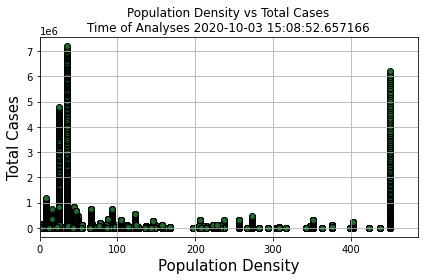

In [10]:
# Scatter Plot
x_value_pop_den = pop_density_cases['population_density']
y_value_cases = pop_density_cases['total_cases']

fig1, ax1 = plt.subplots()
ax1.set_title(f'Population Density vs Total Cases\nTime of Analyses {current_time}')
ax1.set_ylabel('Total Cases', fontsize = 15)
ax1.set_xlabel('Population Density', fontsize=15)
ax1.set_xlim(xmin=0,xmax=pop_upper_bound)
ax1.scatter(x_value_pop_den,y_value_cases,edgecolors='black', c='#1d6b2e')
ax1.grid(True)

fig1.tight_layout()
plt.savefig('..\Images\Population_density_vs_Total_cases.png')
plt.show()

In [11]:
y_value_cases.max()

7191061.0